# Explore here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  category
 1   neighbourhood_group             48895 non-null  category
 2   neighbourhood                   48895 non-null  category
 3   room_type                       48895 non-null  category
 4   price                           48895 non-null  int64   
 5   minimum_nights                  48895 non-null  int64   
 6   number_of_reviews               48895 non-null  int64   
 7   calculated_host_listings_count  48895 non-null  int64   
 8   availability_365                48895 non-null  int64   
dtypes: category(4), int64(5)
memory usage: 3.5 MB


,count,mean,std,min,25%,50%,75%,max
price,44005.0,152.414294,240.844078,0.0,69.0,106.0,175.0,10000.0
minimum_nights,44005.0,7.055925,20.915764,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,44005.0,23.228792,44.441274,0.0,1.0,5.0,23.0,629.0
calculated_host_listings_count,44005.0,7.134553,32.988126,1.0,1.0,1.0,2.0,327.0
availability_365,44005.0,112.808158,131.654252,0.0,0.0,45.0,227.0,365.0


,count,unique,top,freq
host_id,44005,34151,219517861,297
neighbourhood_group,44005,5,Manhattan,19461
neighbourhood,44005,221,Williamsburg,3534
room_type,44005,3,Entire home/apt,22874


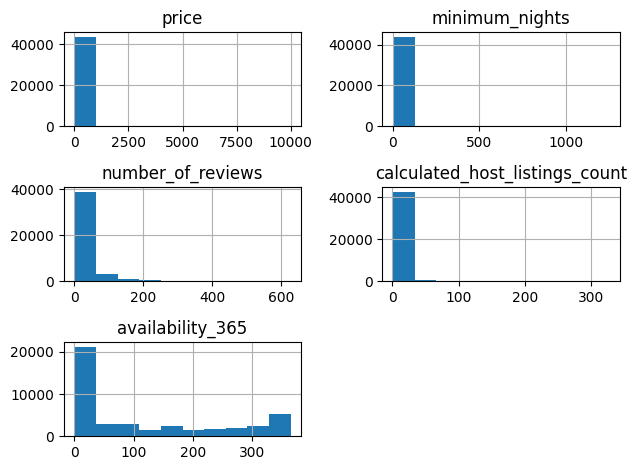

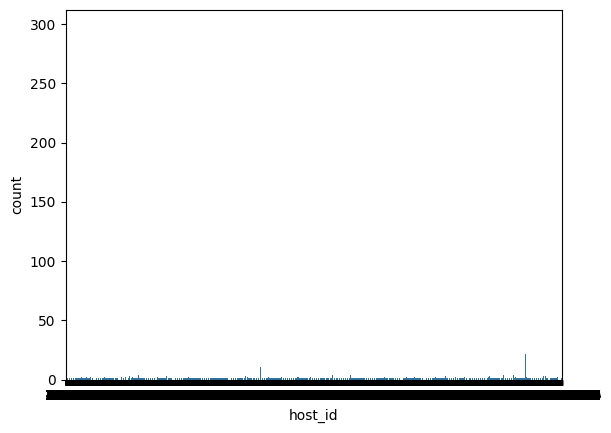

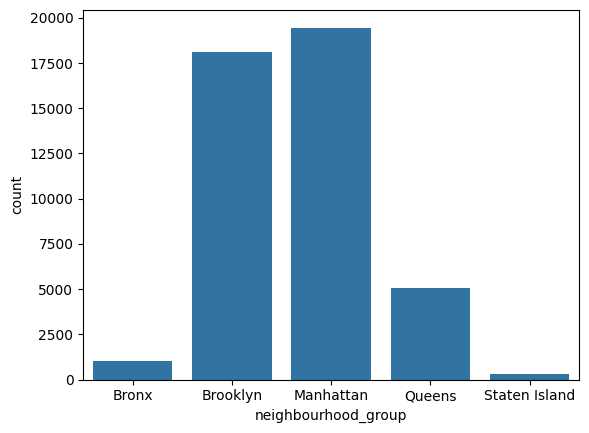

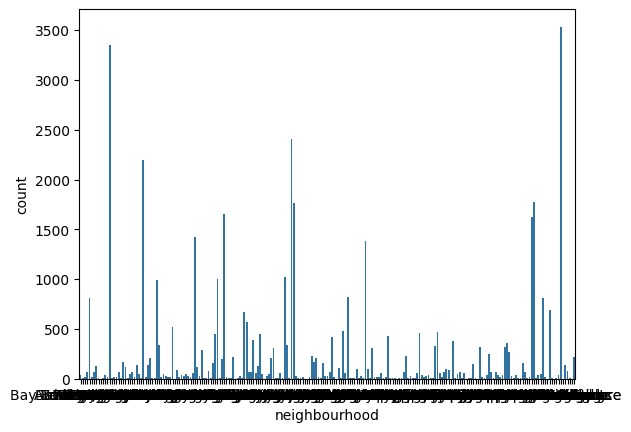

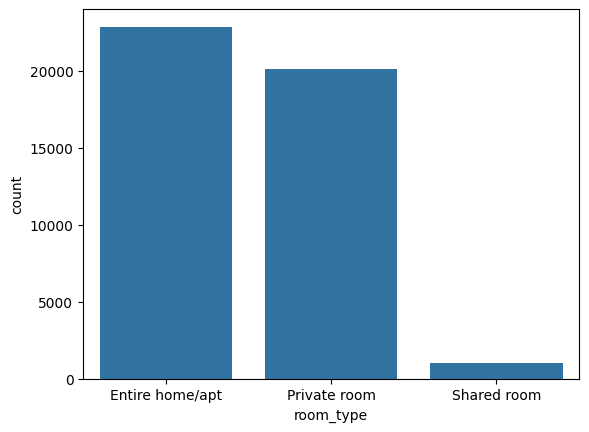

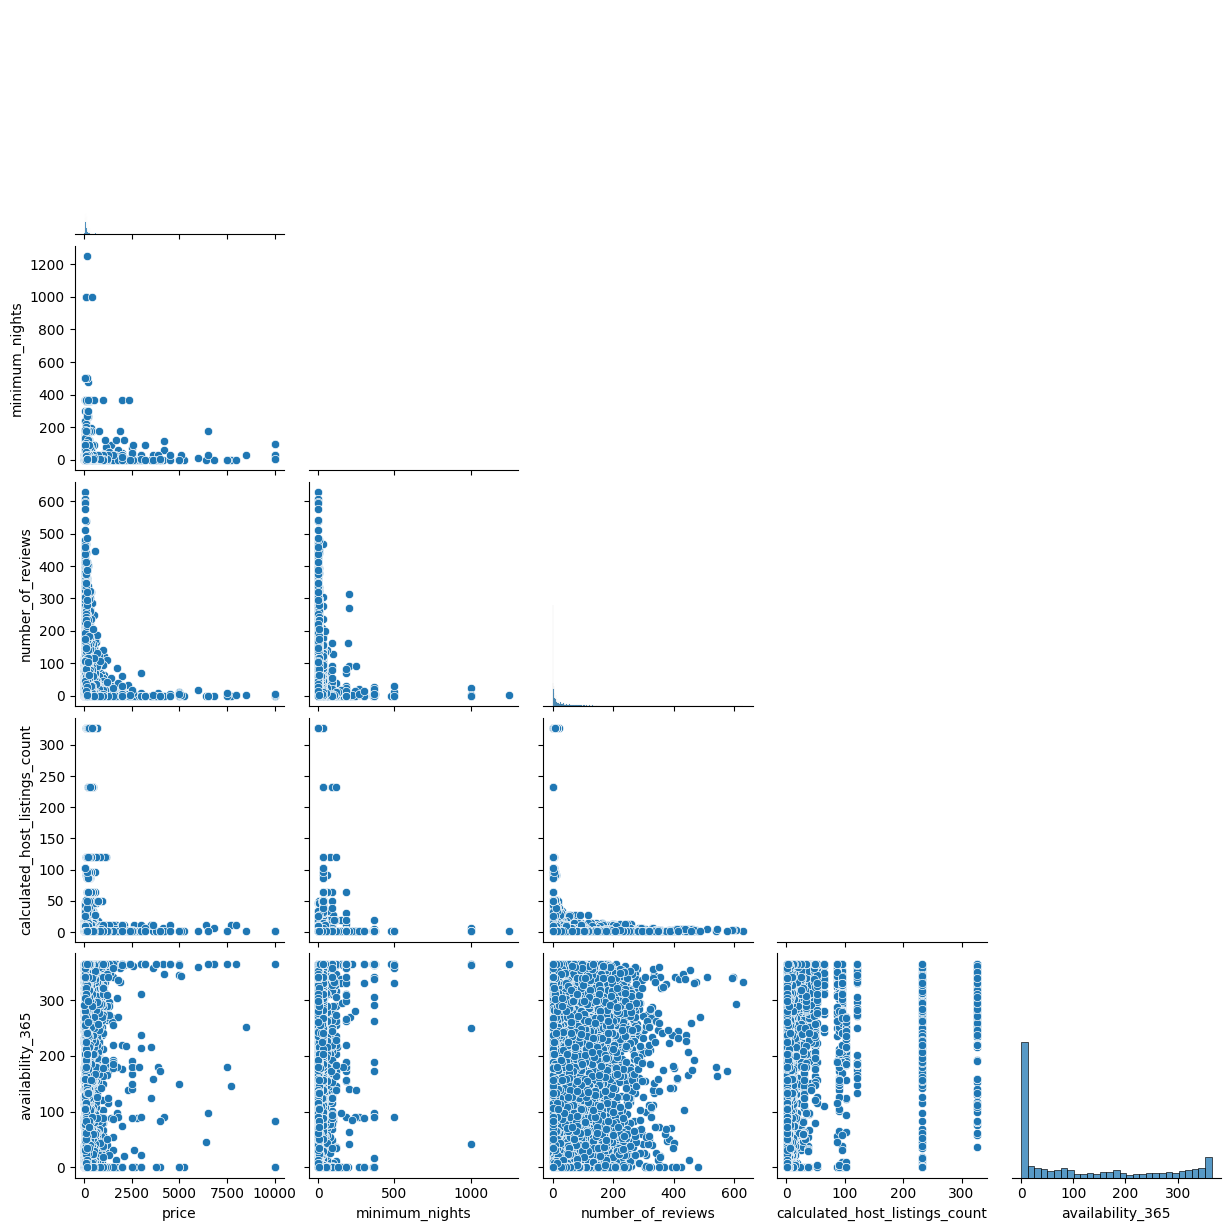

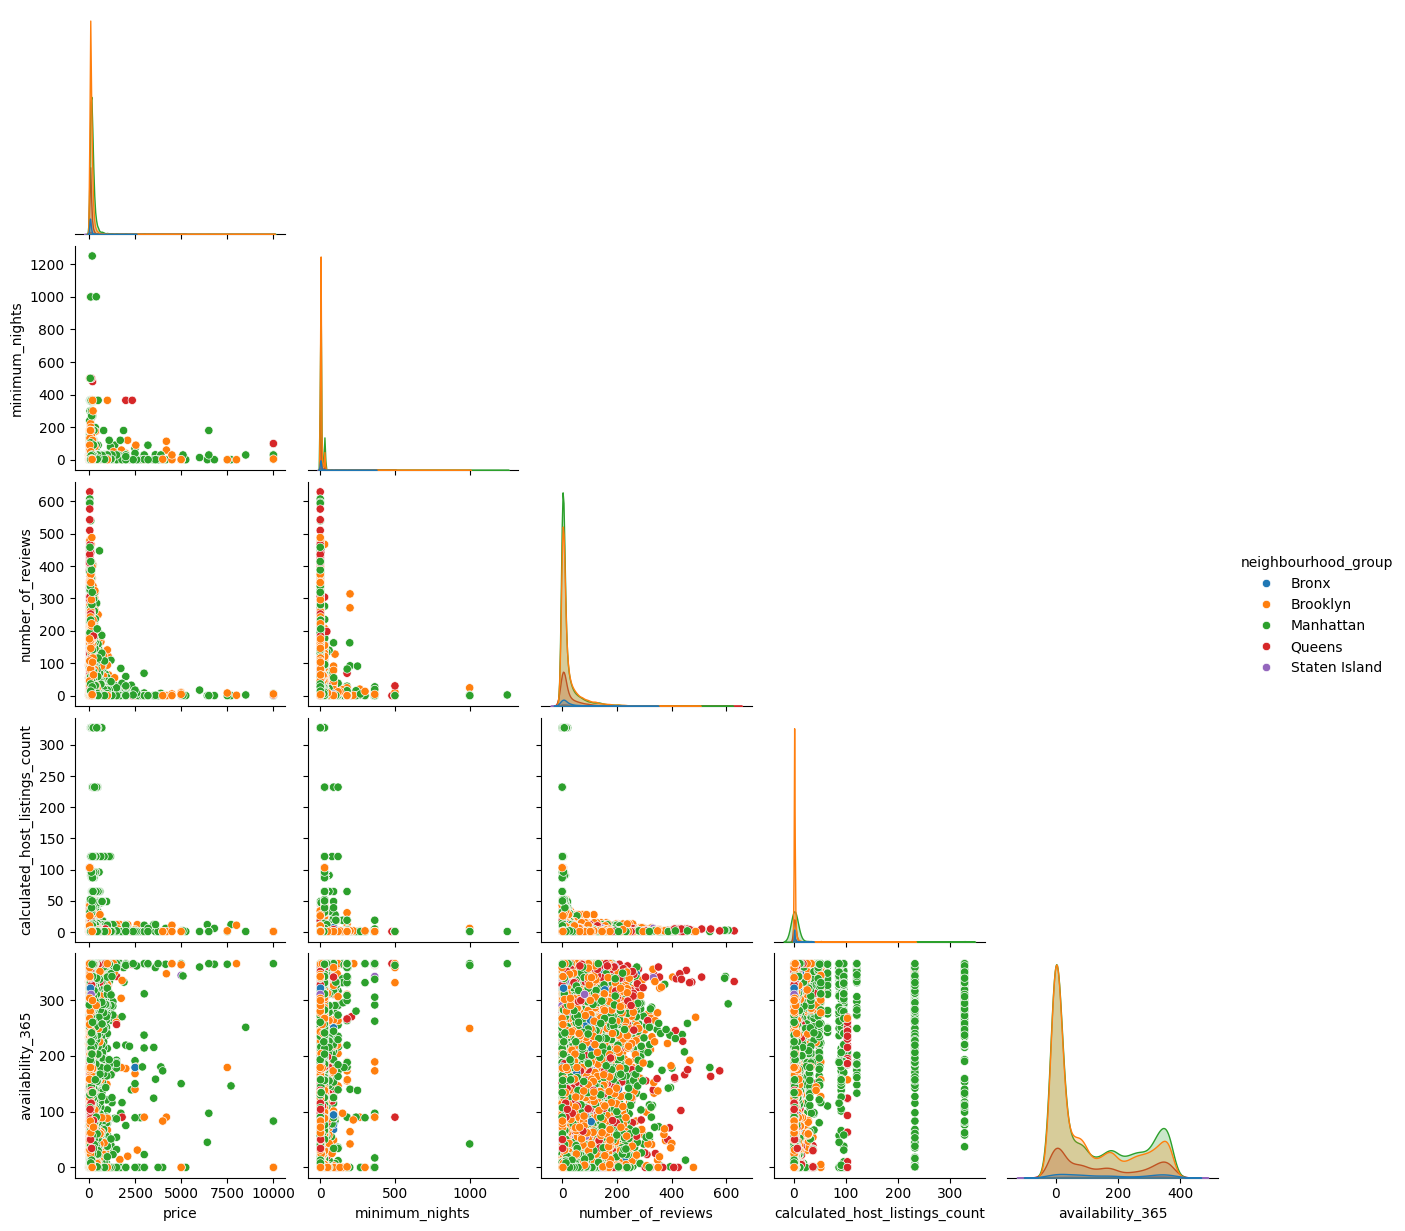

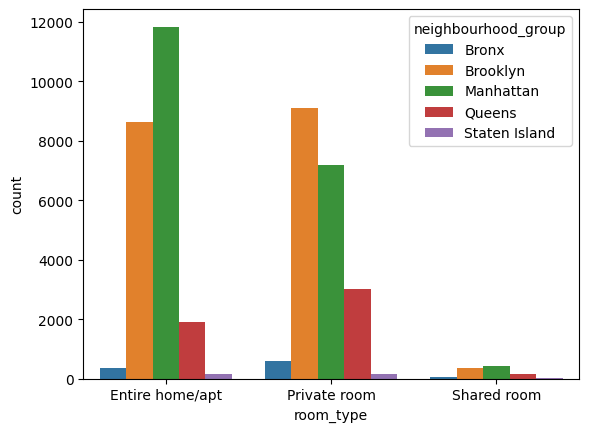

In [1]:
# Step 0: Import Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Herramienta de Machine Learning
from sklearn.model_selection import train_test_split

# Step 1: Load data
url='https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
df_raw = pd.read_csv(url)

df_raw.sample(10, random_state=2025)

# Step 2: Reprocessing
df_baking = df_raw.copy()
df_baking = df_baking.drop(columns=['id','name', 'host_name', 'last_review', 'reviews_per_month','latitude','longitude'])
columnsCategory = ['host_id','neighbourhood_group','neighbourhood','room_type']
df_baking[columnsCategory] = df_baking[columnsCategory].astype('category')
df_baking = df_baking.dropna()
df = df_baking.copy()
df.info()

# Step 3: EDA
df_train, df_test =  train_test_split(df, test_size=0.1, random_state= 2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape
df_train.head(5)

display(df_train.describe(include = 'number').T)
display(df_train.describe(include = 'category').T)

#Análisis univariado
df_train.hist()
plt.tight_layout()
plt.show()

sns.countplot(data= df_train, x='host_id')
plt.show()

sns.countplot(data= df_train, x='neighbourhood_group')
plt.show()

sns.countplot(data= df_train, x='neighbourhood')
plt.show()

sns.countplot(data= df_train, x='room_type')
plt.show()

#Análisis bivariado para datos númericos
sns.pairplot(data = df_train, corner= True)
plt.show()

#comparamos numericos contra categoricos
sns.pairplot(df_train, hue='neighbourhood_group', corner=True)
plt.show()

#Comparamos categorico contra cateogtrico
sns.countplot(df_train, x = "room_type", hue = "neighbourhood_group")
plt.show()

- El promedio del precio difiere mucho con respecto a la media y tiene un desviación grande de 240
- El mínimo de noches que se renta es de 1 noche y el máximo de 1250 siendo el promedio de 7noches
- La mayor cantidad de rentas es en Manhattan con un 44% (19461/44005)
- El departamento completo tiene más demanda con un 52% (22874/44005)
- En el análisis univariado e observa que la disponibilidad_365 tiene mayor cantidad en valores mayor a 300
- En los distritos Manhattan y Brooklyn tiene mayor cantidad de rentas
- El tipo de habitación 'Cuarto compartido' es muy poco rentado
- tiene más demanda rentar el tipo de habitación 'Entero home/apt'